<a href="https://colab.research.google.com/github/kshashank03/data-science-projects/blob/master/Classification_Models/detecting_heavy_drinking_using_motion_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Accelerometer Data to Detect Heavy Drinking

## Library and Data Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob
import string
import warnings

In [140]:
files = glob.glob("/content/drive/My Drive/Data Science/Detecting Heavy Drinking Episodes/data/clean_tac/*.csv")
TAC_data = None

for i, f in enumerate (files):
    if i == 0:
        TAC_data = pd.read_csv(f)
        TAC_data['Participant'] = f[86:92] + "_TAC"
    else:
        tmp = pd.read_csv(f)
        tmp['Participant'] = f[86:92] + "_TAC"
        TAC_data = TAC_data.append(tmp)


TAC_data['timestamp'] = TAC_data['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
TAC_data.head()

,timestamp,TAC_Reading,Participant
0,2017-05-02 09:18:43,-0.010229,SA0297_TAC
1,2017-05-02 09:49:06,-0.002512,SA0297_TAC
2,2017-05-02 09:54:23,0.003249,SA0297_TAC
3,2017-05-02 09:59:39,0.005404,SA0297_TAC
4,2017-05-02 10:04:55,0.003377,SA0297_TAC


## Visualization

In [0]:
TAC_data_pivot = TAC_data.pivot(index='timestamp', columns='Participant', values='TAC_Reading')
TAC_data_pivot.fillna(0, inplace=True)

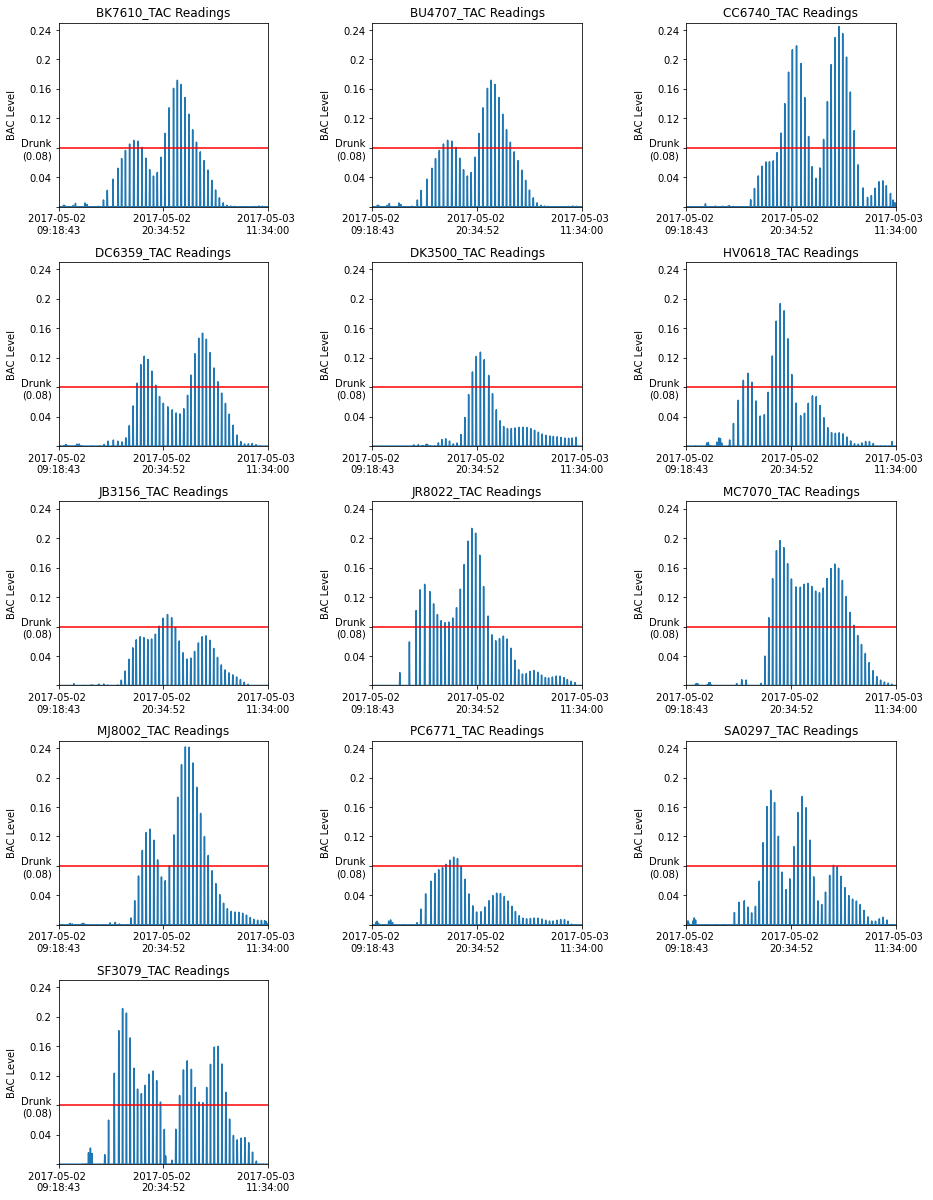

In [155]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 21))
x=1
date_min = TAC_data_pivot.index[0]
date_max = TAC_data_pivot.index[len(TAC_data_pivot.index)-1]
date_mid = TAC_data_pivot.index[len(TAC_data_pivot.index)/2]


for i in TAC_data_pivot.columns:
  plt.subplot(5, 3, x)
  plt.subplot(5, 3, x).set_xticks([0, len(TAC_data_pivot[i])/2, len(TAC_data_pivot[i])-1])
  plt.subplot(5, 3, x).set_xticklabels([date_min[:-8] + "\n" + date_min[-8:], date_mid[:-8] + "\n" + date_mid[-8:], date_max[:-8] + "\n" + date_max[-8:]])
  plt.subplot(5, 3, x).set_yticks([0.00, 0.04, 0.08, 0.12, 0.16, 0.20, 0.24])
  plt.subplot(5, 3, x).set_yticklabels(['', 0.04, 'Drunk\n(0.08)', 0.12, 0.16, 0.20, 0.24])
  plt.subplots_adjust(hspace=0.3, wspace=0.5)
  plt.plot(TAC_data_pivot[i])
  plt.plot(TAC_data_pivot.index, [0.08 for i in range(len(TAC_data_pivot.index))], color='r')
  plt.ylim(0.00, 0.25)
  plt.xlim(date_min, date_max)
  plt.ylabel('BAC Level')
  plt.title(i + " Readings")
  x+=1
